In [1]:
!rm EasyIsing.IsingC.so
#!gcc -shared -Wl,-soname,ising -o IsingC.so -fPIC ising.c -lm
%matplotlib inline
import EasyIsing
import numpy as np
import os
import matplotlib.pyplot as plt
import time

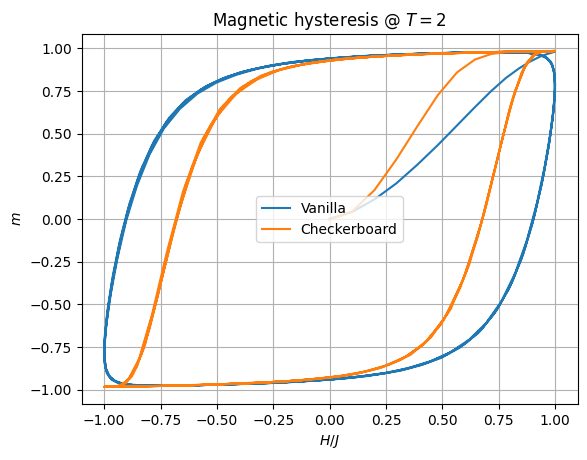

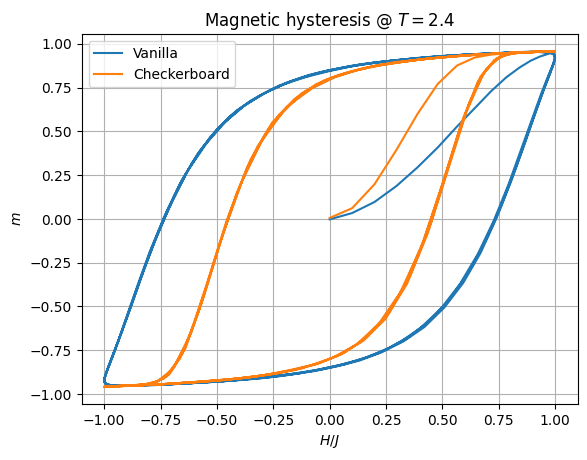

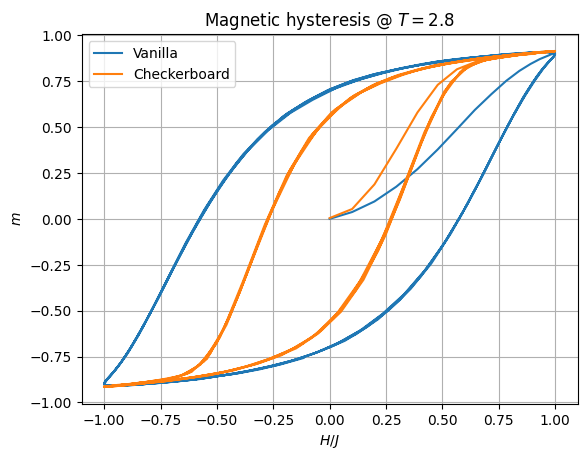

In [3]:
L = 512

H = [np.sin(t) for t in np.arange(0,31.4, 0.1)]

for T in [2, 2.4, 2.8]:
    fig, ax = plt.subplots()
    for eng, name in zip([EasyIsing.IsingC, EasyIsing.IsingCupy], ['Vanilla', 'Checkerboard']):
        seed = int.from_bytes(os.urandom(4),"big")
        mac = eng(L, seed)

        def F(H):
            mac.update(1,T,H)
            return mac.M/mac.L2

        M = [F(h) for h in H]

        ax.plot(H, M, label = name)

    ax.set(xlabel='$H / J$', ylabel='$m$')
    ax.grid()
    ax.legend()
    plt.title('Magnetic hysteresis @ '+'$T = '+str(T)+'$')
    fig.savefig('mh'+str(T)+'.jpg')
    plt.show()
